In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pandas_htools

In [30]:
df = pd.read_csv('/Users/hmamin/data/stocks/dsf2010.tdf', nrows=100, sep='\t')
df.shape

(100, 12)

In [31]:
d1 = df.sample(frac=.8)
d2 = df.sample(frac=.8)

In [36]:
d1.loc[68]

KeyError: 68

In [32]:
d1.merge(d2, how='inner')

,CUSIP,PERMNO,PERMCO,ISSUNO,HSICCD,DATE,BIDLO,ASKHI,PRC,VOL,RET,SHROUT
0,36720410,10001,7953,10398,4925,20100517,10.5490,11.0990,10.9800,22000,0.039763,6070
1,36720410,10001,7953,10398,4925,20100212,9.8500,10.0800,10.0750,8500,0.006493,4361
2,36720410,10001,7953,10398,4925,20100408,10.1600,10.4000,10.3305,9900,-0.008342,4361
3,36720410,10001,7953,10398,4925,20100405,10.1800,10.3400,10.3200,8700,0.006829,4361
4,36720410,10001,7953,10398,4925,20100504,11.4000,11.7000,11.5600,11100,-0.020339,6070
...,...,...,...,...,...,...,...,...,...,...,...,...
57,36720410,10001,7953,10398,4925,20100303,10.0201,10.0999,10.0250,3700,-0.002498,4361
58,36720410,10001,7953,10398,4925,20100122,10.0400,10.1300,10.1000,17100,0.004975,4361
59,36720410,10001,7953,10398,4925,20100111,10.3600,10.9200,10.5000,23100,0.015474,4361
60,36720410,10001,7953,10398,4925,20100125,9.8000,10.5000,9.8600,30400,-0.023762,4361


In [37]:
def anti_join(df_left, df_right, left_on=None, right_on=None, **kwargs):
    right = df_right.copy()
    right['XX_RHS_XX'] = True
    merged = df_left.merge(right, how='left', left_on=left_on, 
                           right_on=right_on or left_on, 
                           suffixes=['', '_rhs'], **kwargs)
    return merged.loc[merged.XX_RHS_XX.isnull(), df_left.columns]

In [38]:
anti_join(d1, d2, ['CUSIP', 'PERMNO', 'DATE'])

,CUSIP,PERMNO,PERMCO,ISSUNO,HSICCD,DATE,BIDLO,ASKHI,PRC,VOL,RET,SHROUT
5,36720410,10001,7953,10398,4925,20100201,9.95,10.1100,9.9900,9600,-0.006958,4361
16,36720410,10001,7953,10398,4925,20100519,11.20,11.3300,11.3200,7600,0.009003,6070
23,36720410,10001,7953,10398,4925,20100128,10.02,10.2200,10.1500,13500,0.017381,4361
28,36720410,10001,7953,10398,4925,20100526,11.23,11.5700,11.2500,11700,0.001790,6070
29,36720410,10001,7953,10398,4925,20100107,9.91,10.3695,9.9600,29200,-0.033948,4361
34,36720410,10001,7953,10398,4925,20100204,10.00,10.0800,10.0100,3600,-0.008921,4361
37,36720410,10001,7953,10398,4925,20100210,9.98,10.1900,10.0000,8600,-0.017133,4361
38,36720410,10001,7953,10398,4925,20100324,10.00,10.1300,10.0500,8100,0.003996,4361
39,36720410,10001,7953,10398,4925,20100414,10.89,11.0501,10.9499,26600,0.001088,4361
42,36720410,10001,7953,10398,4925,20100525,11.01,11.2900,11.2299,12600,-0.007082,6070


In [42]:
d1.BIDLO.quantile(np.arange(0, 1, .1))

0.0     9.65000
0.1     9.90000
0.2     9.95000
0.3     9.98952
0.4    10.00000
0.5    10.06000
0.6    10.16800
0.7    10.34000
0.8    10.58920
0.9    11.20000
Name: BIDLO, dtype: float64

In [55]:
def verbose_plot(df, **kwargs):
    df.plot(**kwargs)
    df.pprint()
#     plt.show()

,BIDLO
0.0,9.65000
0.1,9.90000
0.2,9.95000
0.3,9.98952
0.4,10.00000
0.5,10.06000
0.6,10.16800
0.7,10.34000
0.8,10.58920
0.9,11.20000


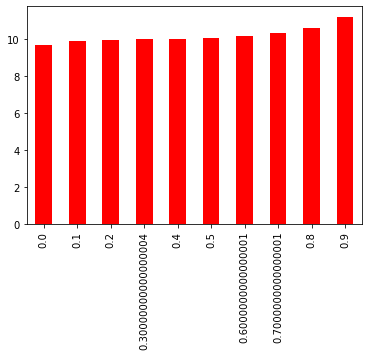

In [56]:
verbose_plot(d1.BIDLO.quantile(np.arange(0, 1, .1)), kind='bar', color='red')

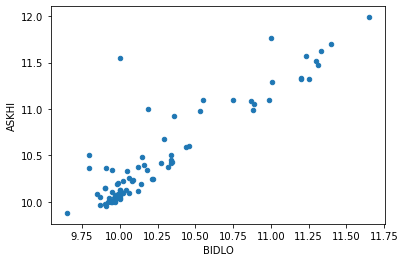

In [61]:
d1[['BIDLO', 'ASKHI']].plot(x='BIDLO', y='ASKHI', kind='scatter')
plt.show()

In [63]:
df.head(None)

,CUSIP,PERMNO,PERMCO,ISSUNO,HSICCD,DATE,BIDLO,ASKHI,PRC,VOL,RET,SHROUT
0,36720410,10001,7953,10398,4925,20100104,10.10,10.5800,10.2500,18500,-0.004854,4361
1,36720410,10001,7953,10398,4925,20100105,9.80,10.3600,10.1900,23200,-0.005854,4361
2,36720410,10001,7953,10398,4925,20100106,10.15,10.4800,10.3100,18700,0.011776,4361
3,36720410,10001,7953,10398,4925,20100107,9.91,10.3695,9.9600,29200,-0.033948,4361
4,36720410,10001,7953,10398,4925,20100108,10.00,10.4000,10.3400,25100,0.038153,4361
...,...,...,...,...,...,...,...,...,...,...,...,...
95,36720410,10001,7953,10398,4925,20100520,11.31,11.4706,11.3300,14700,0.000883,6070
96,36720410,10001,7953,10398,4925,20100521,11.20,11.3192,11.2000,15900,-0.011474,6070
97,36720410,10001,7953,10398,4925,20100524,11.25,11.3200,11.3100,8000,0.009821,6070
98,36720410,10001,7953,10398,4925,20100525,11.01,11.2900,11.2299,12600,-0.007082,6070


In [72]:
def ordered_pseudoset(vals):
    return dict.fromkeys(vals).keys()

In [73]:
s = ordered_pseudoset(['b', 'a', 'c', 'd', 'd', 'd', 'e', 'a'])
s

dict_keys(['b', 'a', 'c', 'd', 'e'])

In [74]:
'c' in s, 'z' in s

(True, False)

In [77]:
list(s), set(s)

(['b', 'a', 'c', 'd', 'e'], {'a', 'b', 'c', 'd', 'e'})

In [78]:
next(iter(s))

'b'

In [79]:
next(iter(list(s)))

'b'

In [80]:
from collections.abc import Iterable

In [81]:
isinstance(dict(), Iterable)

True

In [82]:
isinstance(range(5), Iterable)

True